# **Data manipulation libraries:**

In [19]:
import numpy as np
import pandas as pd

# **Visualization libraries:**


In [20]:
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.image as mpimg
%matplotlib inline

# **ML libraries:**


In [21]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression ,Lasso,Ridge          #build model
from sklearn.model_selection import train_test_split       #data splitting
from sklearn.preprocessing import StandardScaler

#**Load Dataset:**

In [22]:
#Read the housing.csv dataset into an object named df
df = pd.read_csv('California_Houses.csv')


In [23]:
# Shows the number of rows and columns in the data
df.shape

(20640, 14)

In [24]:
#show the first five rows of the data set.
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [25]:
#using .info to explore columns index, columns names, non-Null count values and data type in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [26]:
 # Sum total of the null values (if equal zero so no data missed)
df.isnull().sum().sum()
duplicates_no = df.duplicated().sum()
print("No. of duplicated rows = ", duplicates_no)



No. of duplicated rows =  0


In [27]:
#Using .describe() to see the statistics of our values
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [28]:
#create features and label datasets
x=df.drop(columns='Median_House_Value')
x.head()
y=df['Median_House_Value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: Median_House_Value, dtype: float64

In [29]:
# Splitting dataset
X_train, X_test_temp, Y_train, Y_test_temp = train_test_split(x,y,train_size=0.7, random_state =42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_test_temp, Y_test_temp, test_size=0.5, random_state=42)

# **Linear Regression**

In [30]:
#model
LinearRegression_model=LinearRegression()
#fit
LinearRegression_model.fit(X_train,Y_train)
#predict
y_pred_LinearRegression=LinearRegression_model.predict(X_test)



In [31]:
performance = pd.DataFrame({'PREDICTIONS': y_pred_LinearRegression, 'ACTUAL VALUES':Y_test})
performance.head()
performance['error']=performance['ACTUAL VALUES']-performance['PREDICTIONS']
performance.head()

,PREDICTIONS,ACTUAL VALUES,error
1853,109397.731396,68400.0,-40997.731396
584,288124.839575,238600.0,-49524.839575
12228,100718.398335,127900.0,27181.601665
2457,111105.445621,100000.0,-11105.445621
10228,185713.019441,168000.0,-17713.019441


In [32]:
# The coefficients
print('Coefficients: \n', LinearRegression_model.coef_)
# The mean squared error
mse_linear=mean_squared_error(Y_test, y_pred_LinearRegression)
print('Mean squared error: %.2f'% mse_linear)
# The mean absolute error
mae_linear=mean_absolute_error(Y_test, y_pred_LinearRegression)
print('Mean absolute error: %.2f' % mae_linear)

Coefficients: 
 [ 3.91618103e+04  8.93239689e+02 -5.48969462e+00  1.07890566e+02
 -3.84066444e+01  3.78239617e+01 -4.41911768e+04 -2.62032773e+04
 -2.46197661e-01 -1.51872972e-01  2.48921960e-01  1.77062605e-01
 -1.54541168e-01]
Mean squared error: 4504296288.45
Mean absolute error: 49295.58


In [33]:
# Create a StandardScaler object and scale the features for LASSO and RIDGE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# # Convert the Y_train, Y_valid, and Y_test Series to NumPy arrays
# Y_train_array = np.array(Y_train)
# Y_valid_array = np.array(Y_valid)
# Y_test_array = np.array(Y_test)

# # Reshape the NumPy arrays
# Y_train_reshaped = Y_train_array.reshape(-1, 1)
# Y_valid_reshaped = Y_valid_array.reshape(-1, 1)
# Y_test_reshaped = Y_test_array.reshape(-1, 1)

# # Scale the target variables
# Y_train_scaled = scaler.fit_transform(Y_train_reshaped)
# Y_valid_scaled = scaler.transform(Y_valid_reshaped)
# Y_test_scaled = scaler.transform(Y_test_reshaped)



# **Lasso Regression**

In [34]:
# Create a StandardScaler object and scale the features
mse_list = []
alphas = []
# Find best alpha
for alpha in range(1,10):
    alphas.append(alpha)
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train_scaled, Y_train)
    y_pred_Lasso = lasso_model.predict(X_valid_scaled)
    mse_lasso = mean_squared_error(Y_valid, y_pred_Lasso)
    mse_list.append(mse_lasso)
best_alpha = alphas[np.argmin(mse_list)]
print("Best alpha:", best_alpha)




Best alpha: 1


In [35]:
# Now, use the scaled features for training the model
lasso_model = Lasso(alpha=1, max_iter=10000)
lasso_model.fit(X_train_scaled, Y_train)
y_pred_Lasso = lasso_model.predict(X_test_scaled)


In [36]:
# The coefficients
print('Coefficients: \n', lasso_model.coef_)
# The mean squared error
mse_lasso=mean_squared_error(Y_test, y_pred_Lasso)
print('Mean squared error: %.2f'% mse_lasso)
# The mean absolute error
mae_lasso=mean_absolute_error(Y_test, y_pred_Lasso)
print('Mean absolute error: %.2f' %mae_lasso)

Coefficients: 
 [ 74594.77229281  11275.22517935 -11857.2393903   45297.00708111
 -43787.34314933  14431.18691818 -93998.97145993 -52532.52726372
 -12144.9413652  -37644.72801771  71559.86102304  38065.76394883
 -38264.16439281]
Mean squared error: 4504197240.63
Mean absolute error: 49295.93


# **Ridge Regression**

In [39]:
mse_list=[]
alphas=[]
for alpha in range(1,100):
# Now, use the scaled features for training the model
  alphas.append(alpha)
  ridge_model = Ridge(alpha, max_iter=10000)
  ridge_model.fit(X_train_scaled, Y_train)
  y_pred_Ridge = ridge_model.predict(X_valid_scaled)
  mse_ridge=mean_squared_error(Y_valid, y_pred_Ridge)
  mse_list.append(mse_ridge)

best_alpha = alphas[np.argmin(mse_list)]
print("Best alpha:", best_alpha)


Best alpha: 1


In [40]:
#train on valid
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train_scaled, Y_train)
y_pred_Ridge = ridge_model.predict(X_test_scaled)

In [41]:
# The coefficients
print('Coefficients: \n', ridge_model.coef_)
# The mean squared error
mse_ridge=mean_squared_error(Y_test, y_pred_Ridge)
print('Mean squared error: %.2f'% mse_ridge)
# The mean absolute error
mae_ridge=mean_absolute_error(Y_test, y_pred_Ridge)
print('Mean absolute error: %.2f' %mae_ridge )

Coefficients: 
 [ 74587.30035352  11295.65205983 -11850.26113493  45304.49580039
 -43783.33671677  14414.97083292 -92402.93013004 -52744.72065018
 -12254.92030217 -37404.51326782  69582.59138289  37462.2331201
 -37667.14762935]
Mean squared error: 4503908114.32
Mean absolute error: 49297.54


**Mean Squared Error (MSE):** MSE measures the average squared difference between the predicted and actual values. It provides an overall measure of the model's prediction accuracy.

**Mean Absolute Error (MAE)**: MAE measures the average absolute difference between the predicted and actual values. It provides a measure of the average magnitude of errors.





In [42]:
# Compare the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'Mean Squared Error': [mse_linear, mse_lasso, mse_ridge],
    'Mean Absolute Error': [mae_linear, mae_lasso, mae_ridge]
})

print("\nComparison of Regression Models:")
print(results)


Comparison of Regression Models:
               Model  Mean Squared Error  Mean Absolute Error
0  Linear Regression        4.504296e+09         49295.583679
1   Lasso Regression        4.504197e+09         49295.929502
2   Ridge Regression        4.503908e+09         49297.535670


**Plotting the regression lines**

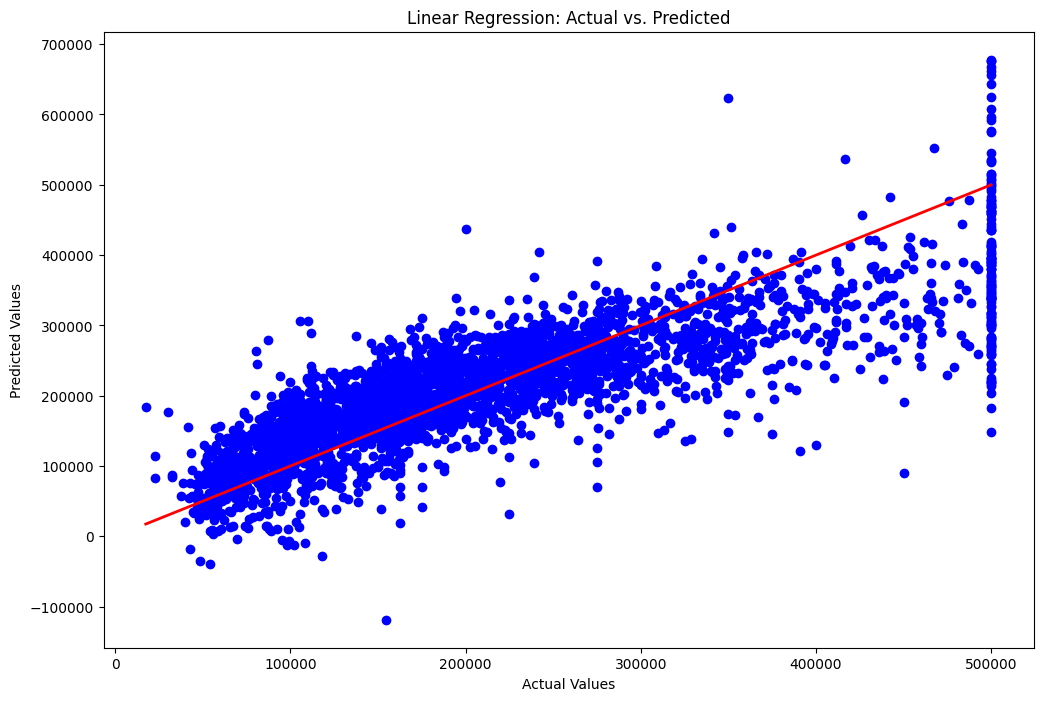

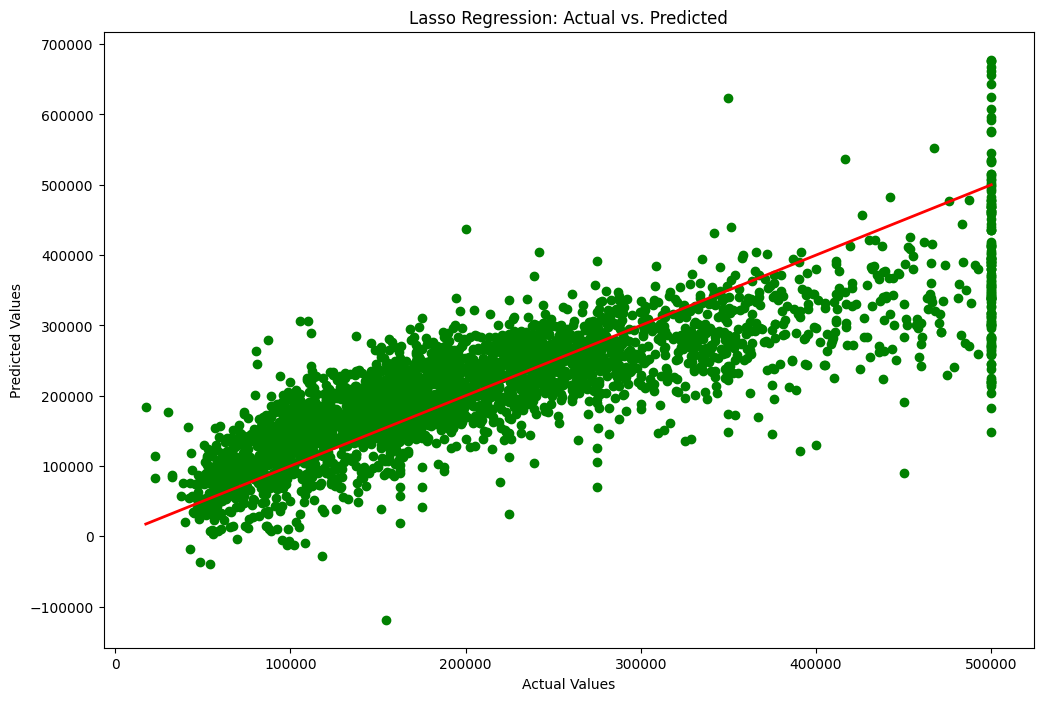

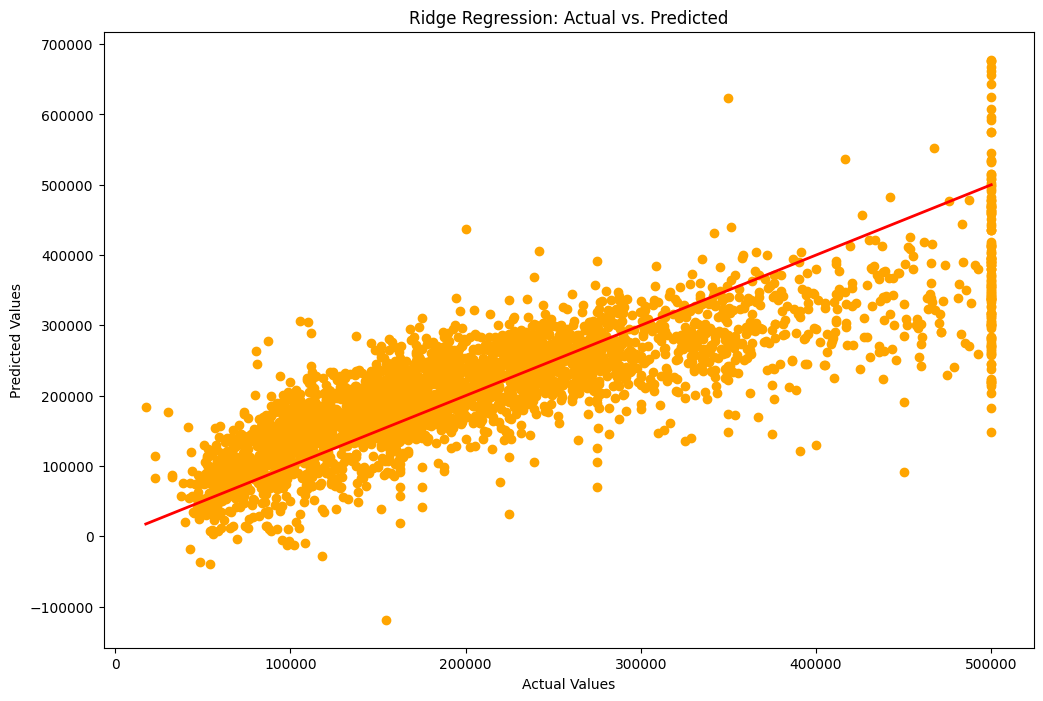

In [43]:
# Linear Regression plot
plt.figure(figsize=(12, 8))
plt.scatter(Y_test, y_pred_LinearRegression, color='blue', alpha=1)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()

# Lasso Regression plot
plt.figure(figsize=(12, 8))
plt.scatter(Y_test, y_pred_Lasso, color='green', alpha=1)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Actual vs. Predicted')
plt.show()

# Ridge Regression plot
plt.figure(figsize=(12, 8))
plt.scatter(Y_test, y_pred_Ridge, color='orange', alpha=1)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual vs. Predicted')
plt.show()

**Comparing The scores of different Models**

In [44]:
# Calculate R-squared scores
r2_linear = r2_score(Y_test, y_pred_LinearRegression)
r2_lasso = r2_score(Y_test, y_pred_Lasso)
r2_ridge = r2_score(Y_test, y_pred_Ridge)

# Compare the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'Mean Squared Error': [mse_linear, mse_lasso, mse_ridge],
    'Mean Absolute Error': [mae_linear, mae_lasso, mae_ridge],
    'R-squared Score': [r2_linear, r2_lasso, r2_ridge]
})

print("\nComparison of Regression Models:")
print(results)


Comparison of Regression Models:
               Model  Mean Squared Error  Mean Absolute Error  R-squared Score
0  Linear Regression        4.504296e+09         49295.583679         0.665859
1   Lasso Regression        4.504197e+09         49295.929502         0.665866
2   Ridge Regression        4.503908e+09         49297.535670         0.665887
